# ANN 2 - Regression - Combined Cycle Power Plants

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_excel('../Data/Folds5x2_pp.xlsx')
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


<Axes: >

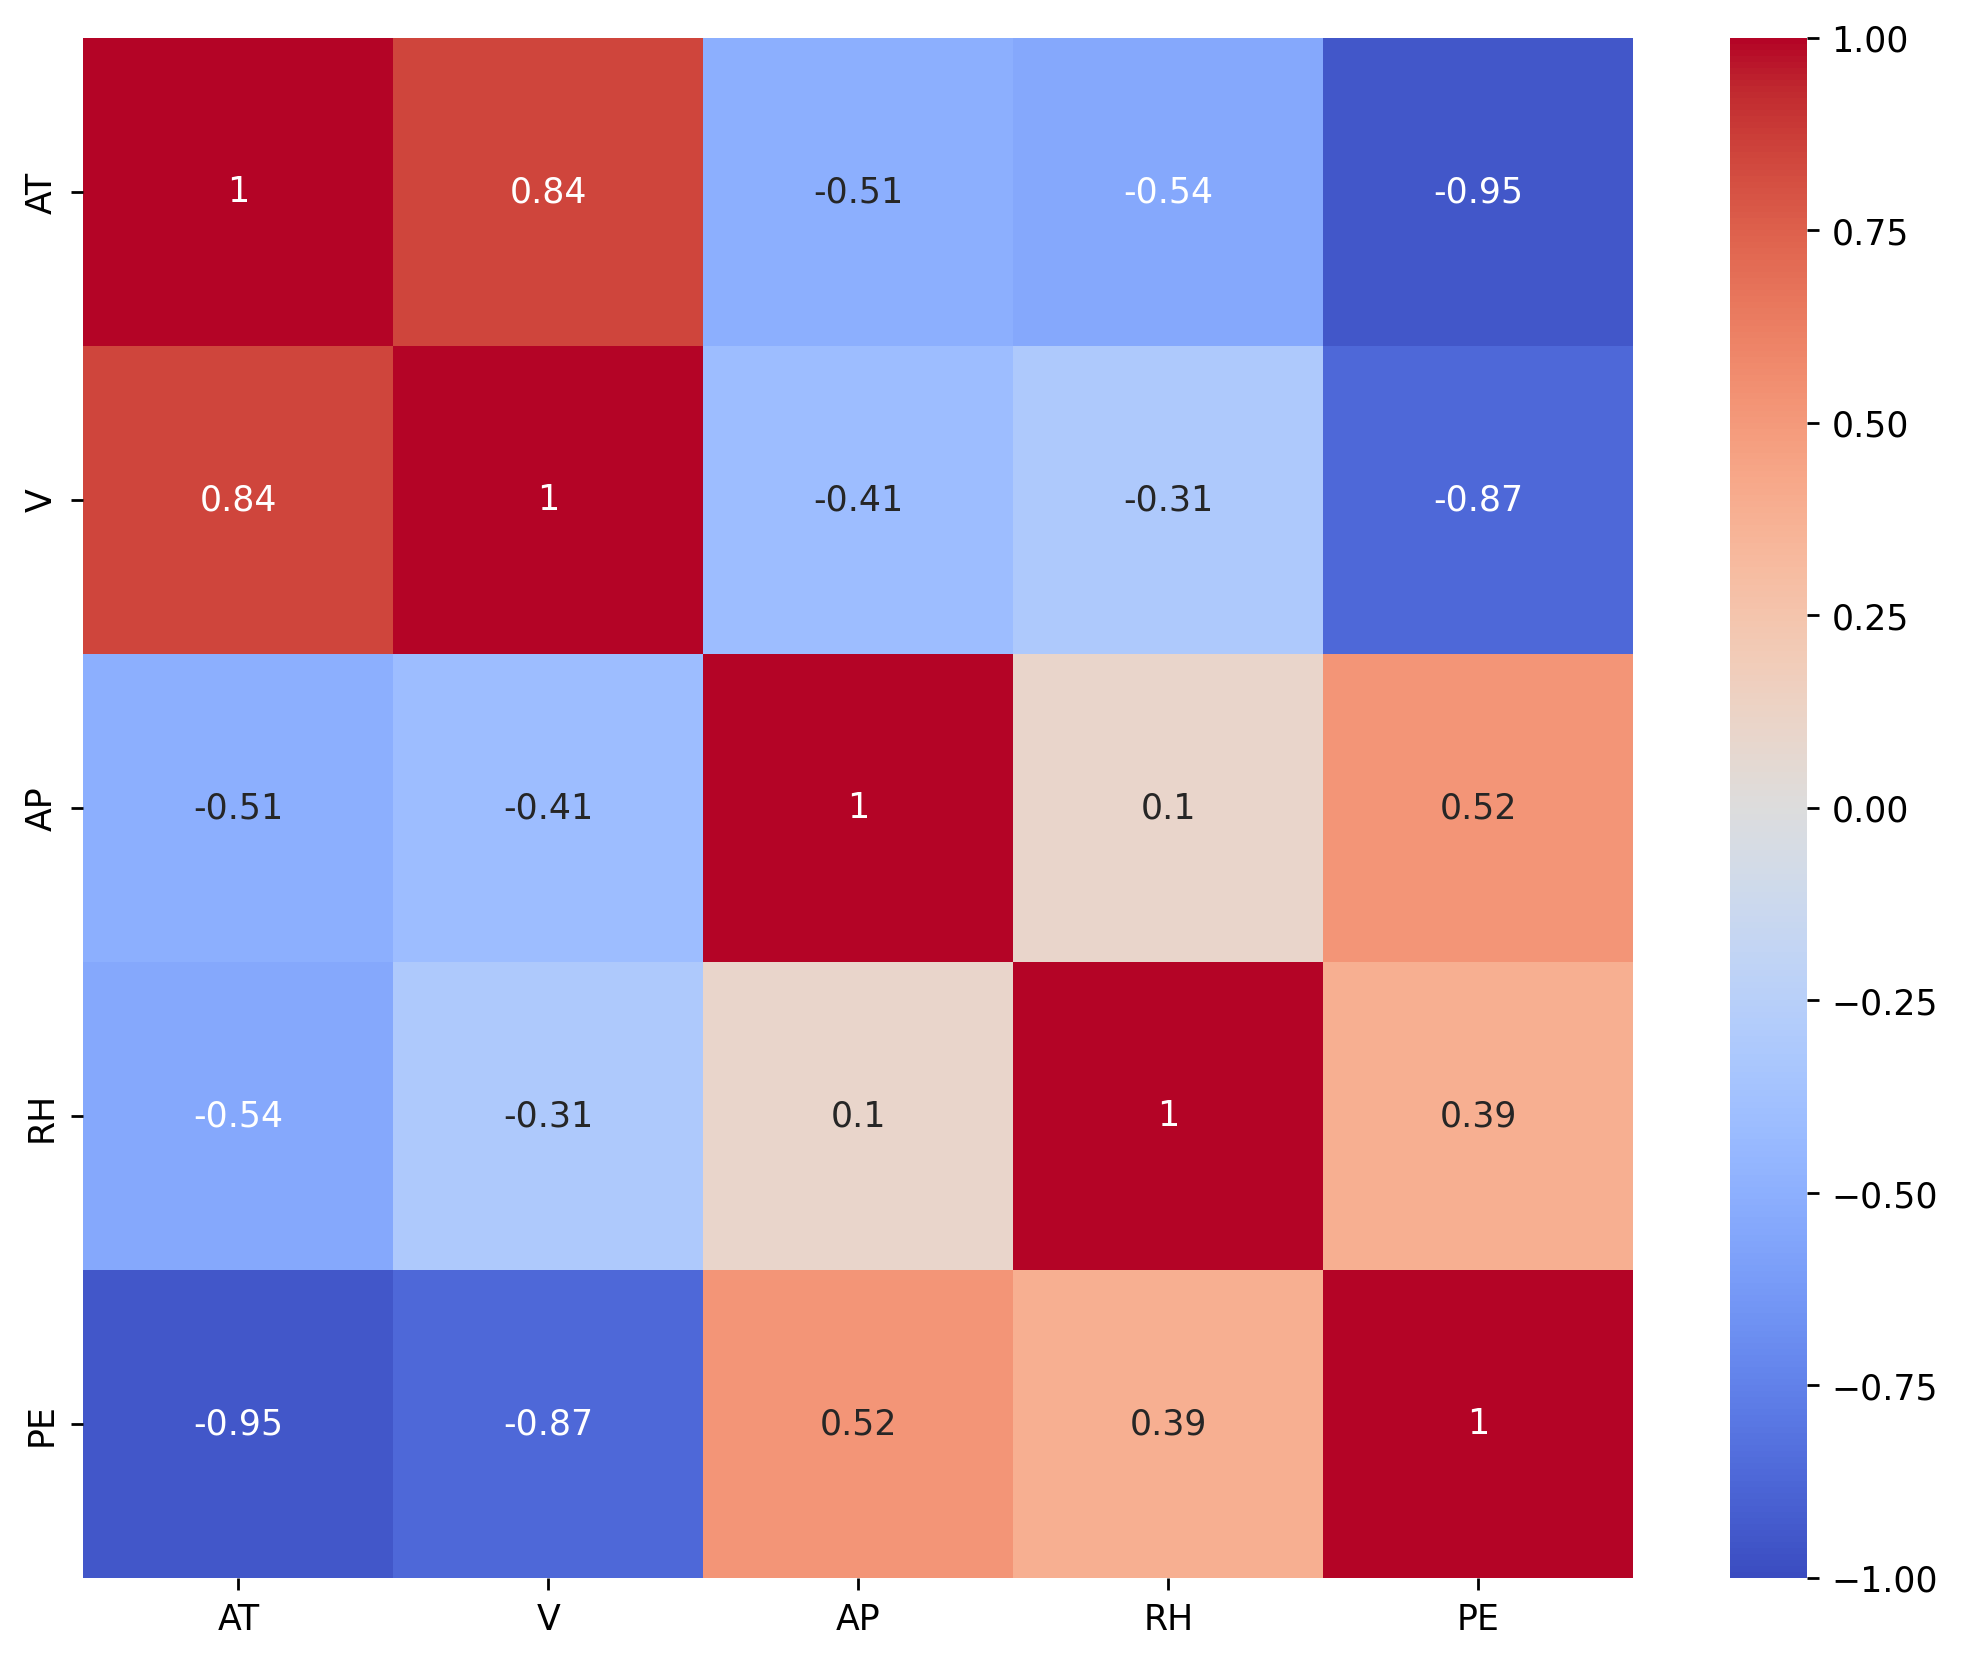

In [4]:
plt.figure(figsize=(10,8), dpi=250)
sns.heatmap(data=dataset.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm' )

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [10]:
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [11]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [12]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100

240/240 [==============================] - 1s 1ms/step - loss: 19878.9297
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 93.4736
Epoch 3/100
240/240 [==============================] - 0s 968us/step - loss: 87.7968
Epoch 4/100
240/240 [==============================] - 0s 969us/step - loss: 81.0854
Epoch 5/100
240/240 [==============================] - 0s 977us/step - loss: 73.8318
Epoch 6/100
240/240 [==============================] - 0s 973us/step - loss: 66.1943
Epoch 7/100
240/240 [==============================] - 0s 952us/step - loss: 59.1611
Epoch 8/100
240/240 [==============================] - 0s 936us/step - loss: 52.6079
Epoch 9/100
240/240 [==============================] - 0s 982us/step - loss: 46.6939
Epoch 10/100
240/240 [==============================] - 0s 935us/step - loss: 41.7093
Epoch 11/100
240/240 [==============================] - 0s 937us/step - loss: 37.7165
Epoch 12/100
240/240 [==============================] - 0s 937u

240/240 [==============================] - 0s 942us/step - loss: 28.9868
Epoch 94/100
240/240 [==============================] - 0s 942us/step - loss: 27.0603
Epoch 95/100
240/240 [==============================] - 0s 960us/step - loss: 27.4755
Epoch 96/100
240/240 [==============================] - 0s 939us/step - loss: 28.1437
Epoch 97/100
240/240 [==============================] - 0s 1ms/step - loss: 27.8434
Epoch 98/100
240/240 [==============================] - 0s 937us/step - loss: 27.0116
Epoch 99/100
240/240 [==============================] - 0s 948us/step - loss: 29.7339
Epoch 100/100
240/240 [==============================] - 0s 946us/step - loss: 27.8013


In [13]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 797us/step
[[431.09 431.23]
 [462.1  460.01]
 [465.59 461.14]
 ...
 [472.8  473.26]
 [439.68 438.  ]
 [458.84 463.28]]


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [15]:
y_pred = ann.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

60/60 [==============================] - 0s 805us/step
MAE: 3.94
MSE: 24.63
RMSE: 4.96


In [16]:
single_input = np.array([[15.75, 52.34, 1015.44, 75.12]])

In [17]:
prediction = ann.predict(single_input)
print(prediction)

1/1 [==============================] - 0s 18ms/step
[[462.03]]
